In [1]:
import math, random, pickle, os, copy, itertools, sys
import torch, logging, scipy.io
import numpy as np
import pandas as pd
from numpy import random
from datetime import datetime
import matplotlib.pyplot as plt
from collections.abc import Iterable

PROJECT_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.insert(1, PROJECT_DIR)

from third_party.Synthetic_PV_Profiles import CityPV_UniModal, CityPV_MultiModal
from third_party.Synthetic_PV_Profiles import get_available_modules, get_available_inverters, visualize_pv, visualize_env
from experiments.data_sim import PVDataset

random_seed = 3
random.seed(random_seed)
np.random.seed(random_seed)
random_state = np.random.RandomState(random_seed)


/home/mahrokhg/anaconda3/envs/python3/lib/python3.10/site-packages/pvlib/pvsystem.py:2417: UserWarning: Original names contain 12 duplicate(s).
  warnings.warn('Original names contain %d duplicate(s).' % n_duplicates)
/home/mahrokhg/anaconda3/envs/python3/lib/python3.10/site-packages/pvlib/pvsystem.py:2421: UserWarning: Normalized names contain 12 duplicate(s).
  warnings.warn(


# Uni-Modal Heterogeneous Clients Distribution
All clients are located in Lausanne and share the same latitude and longitude


Difference among clients in:
* PV cell orientation (tilt and azimuth)
* temperature and wind speed
* altitude from see level
* PV module and inverter technology
* Shaddows

## Effect of Shadows
* two clients
* a shadow appears for a while on the roof of each house
* everything same except the shadow timing

[INFO] generating data for Lausanne
[INFO] generating data for Lausanne

 3 households at Lausanne Lausanne - tilt_std: 0.0, az_std: 0.0, weather_dev: 0.0, irrad_std: 0.0, altitude_dev: 0.0, same module_name, same inverter_name, 


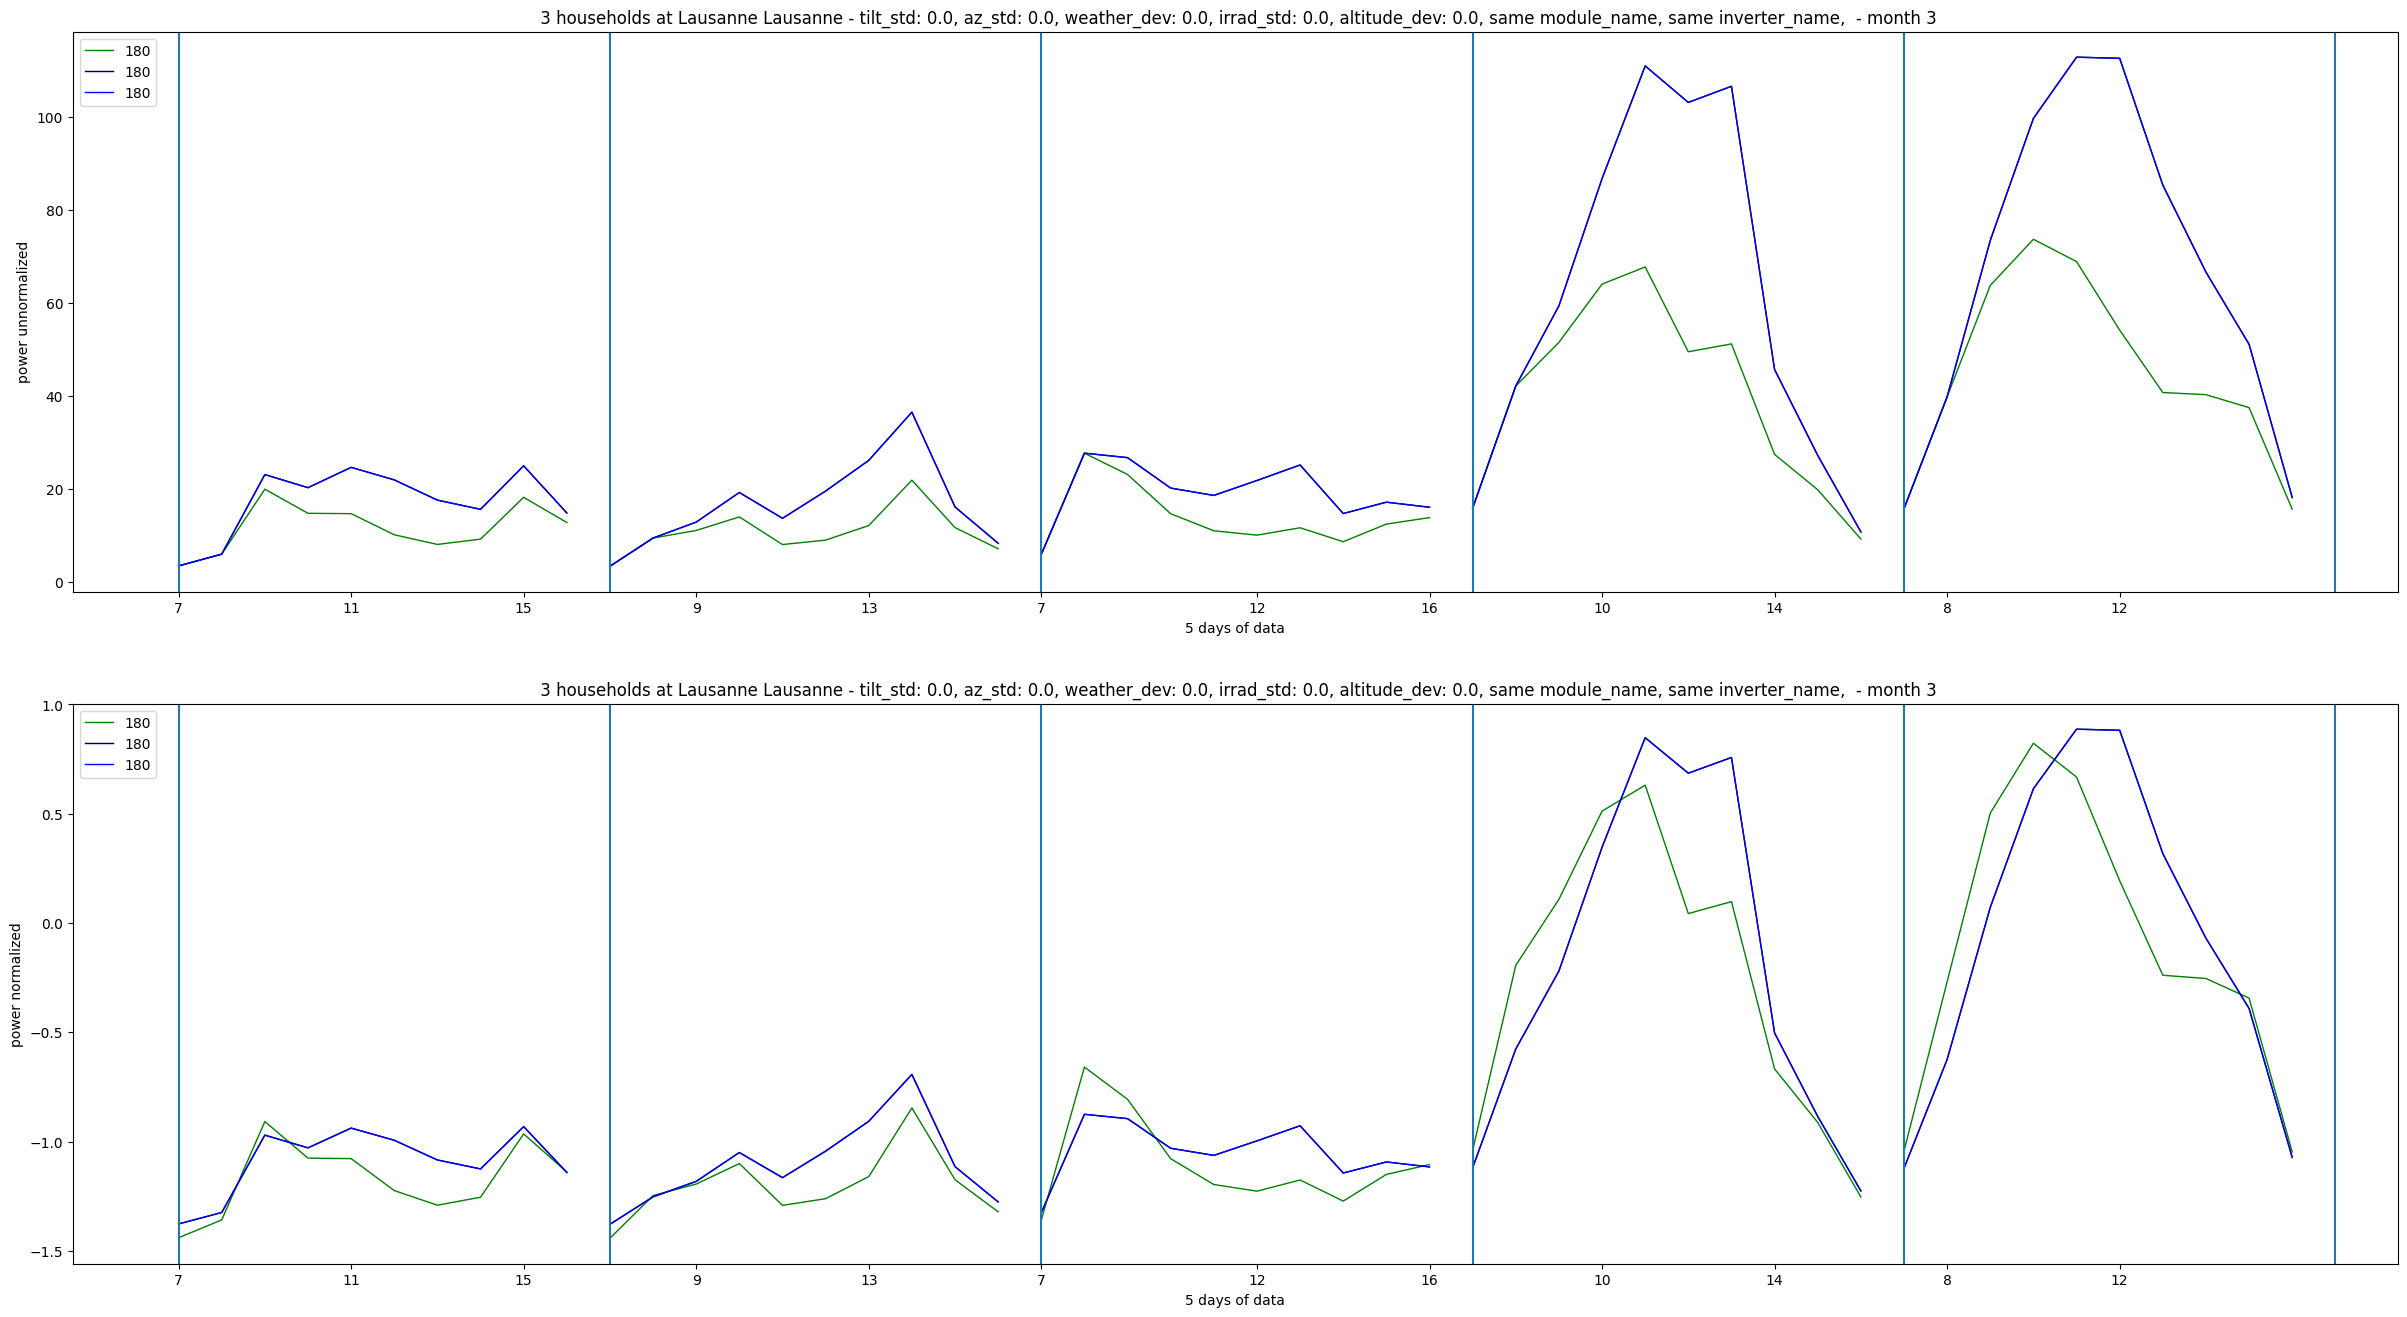

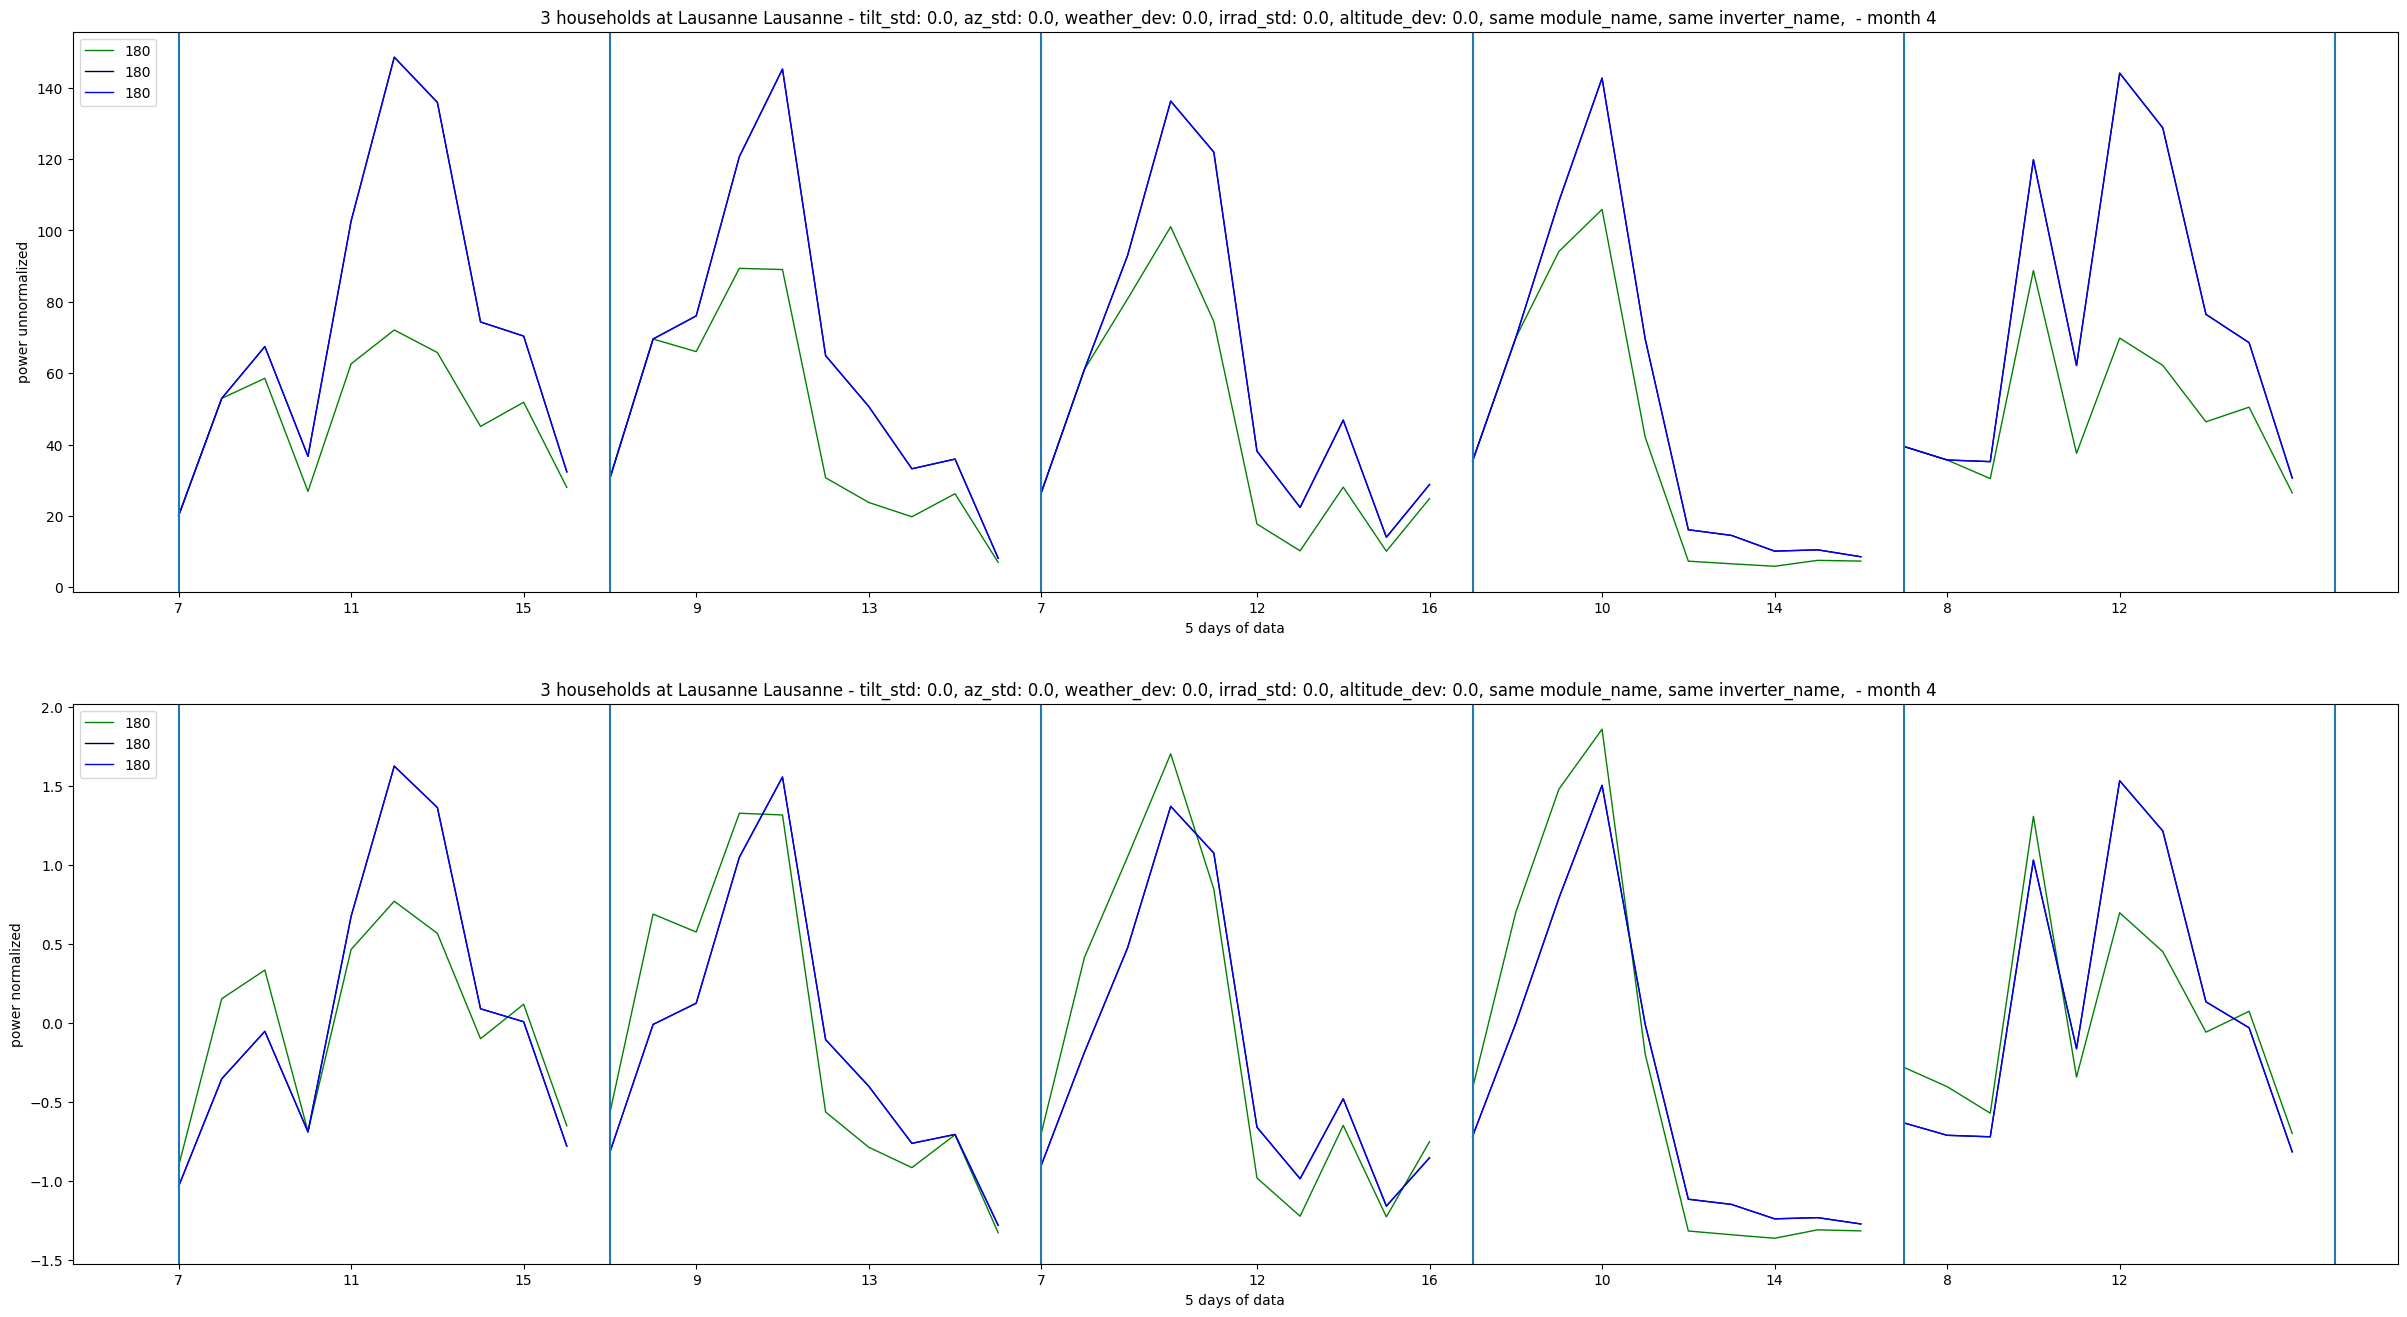

[{'st': 9, 'en': 16, 'peak_red': 0.5},
 {'st': None, 'en': None, 'peak_red': None},
 {'st': None, 'en': None, 'peak_red': None}]

In [2]:
num_clients=3
city_names = ['Lausanne', 'Lausanne']
env_dict = {'city_names':city_names,
        'num_clients': num_clients, 'num_clients_per_mode':[1,2],
        'tilt_std': 0, 'az_std': 0, 'weather_dev':0,
        'irrad_std':0, 'altitude_dev':0, 'shadow_peak_red':[0.5,1],
        'module_name': ['Canadian_Solar_CS5P_220M___2009_'],
        'inverter_name': ['ABB__MICRO_0_25_I_OUTD_US_208__208V_'],
        'lags':[1], 'months':[3,4], 'hours':np.arange(7, 17), 'years':[2018, 2019],
        'train_scenarios':{'1y':{'m_train':None, 'train_years':[2018], 'exclude_last_year':True}}}


env_dict = PVDataset(env_dict).generate_clients_data()
print('\n'+env_dict['info'])

visualize_env(env_dict, num_days=5, year=2018)
env_dict['clients_config']['shadows']



# Changing properties except azimuth and shaddow

[INFO] generating data for Lausanne
[INFO] the following constnat features were removed:  station_irrad_direct_prev station_irrad_diffuse_prev

24 households at Lausanne - tilt_std: 5.0, az_std: 0.0, weather_dev: 0.1, irrad_std: 0.2, altitude_dev: 0.1, shadow_peak_red: 1.0, different module_name, different inverter_name, 


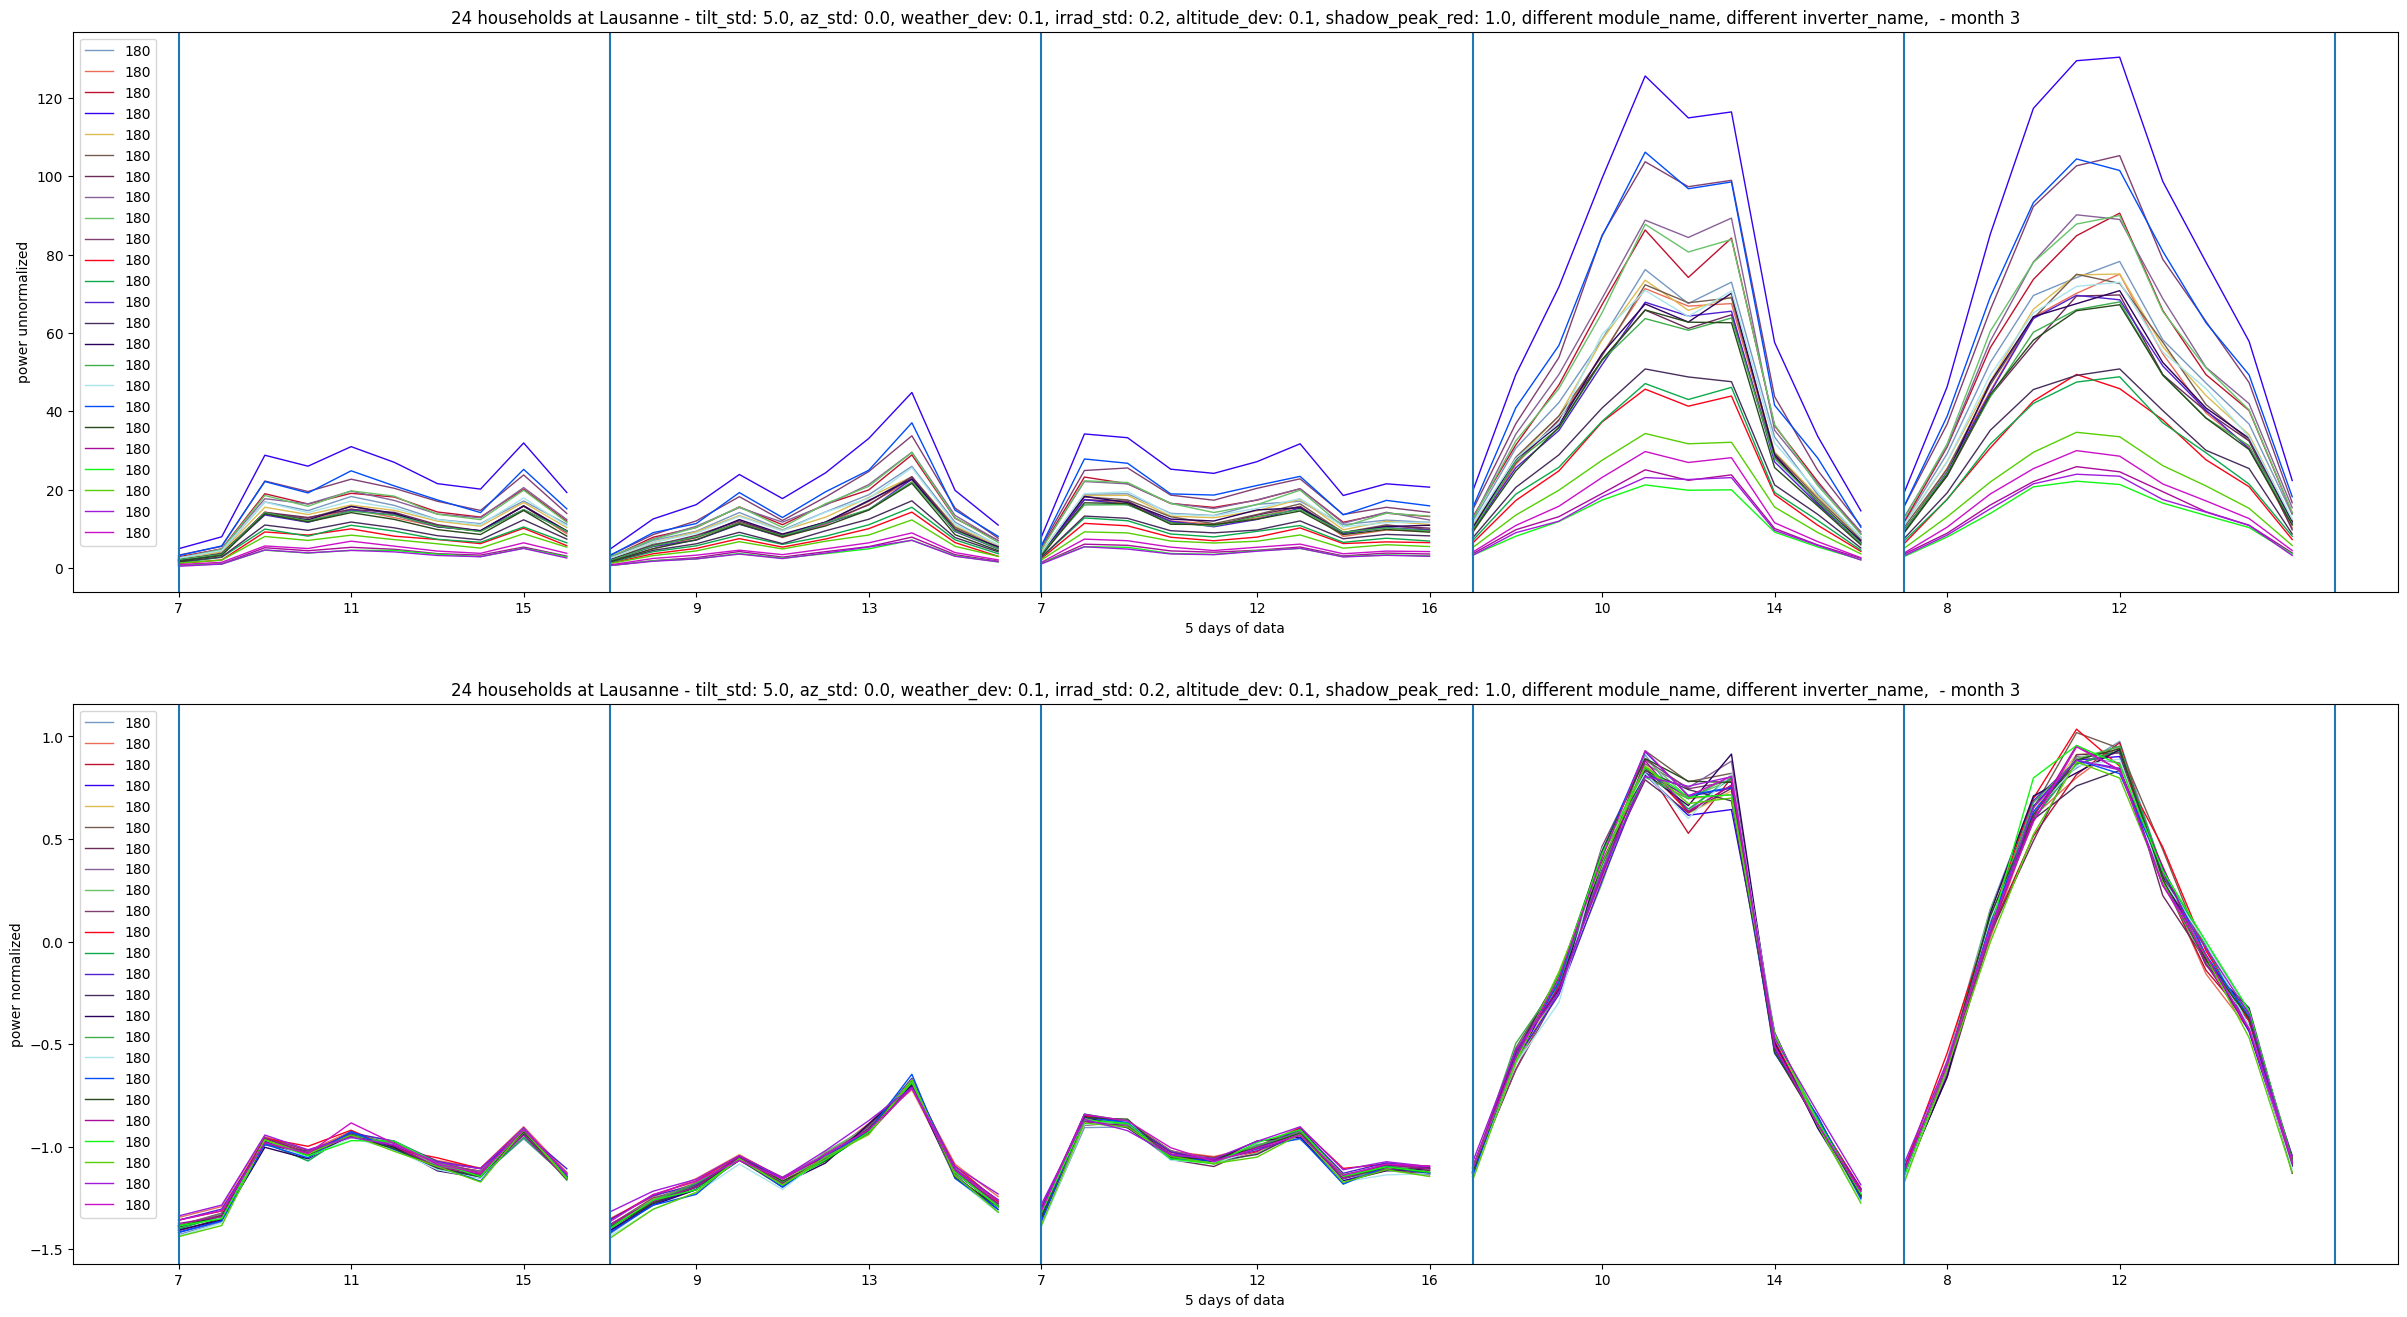

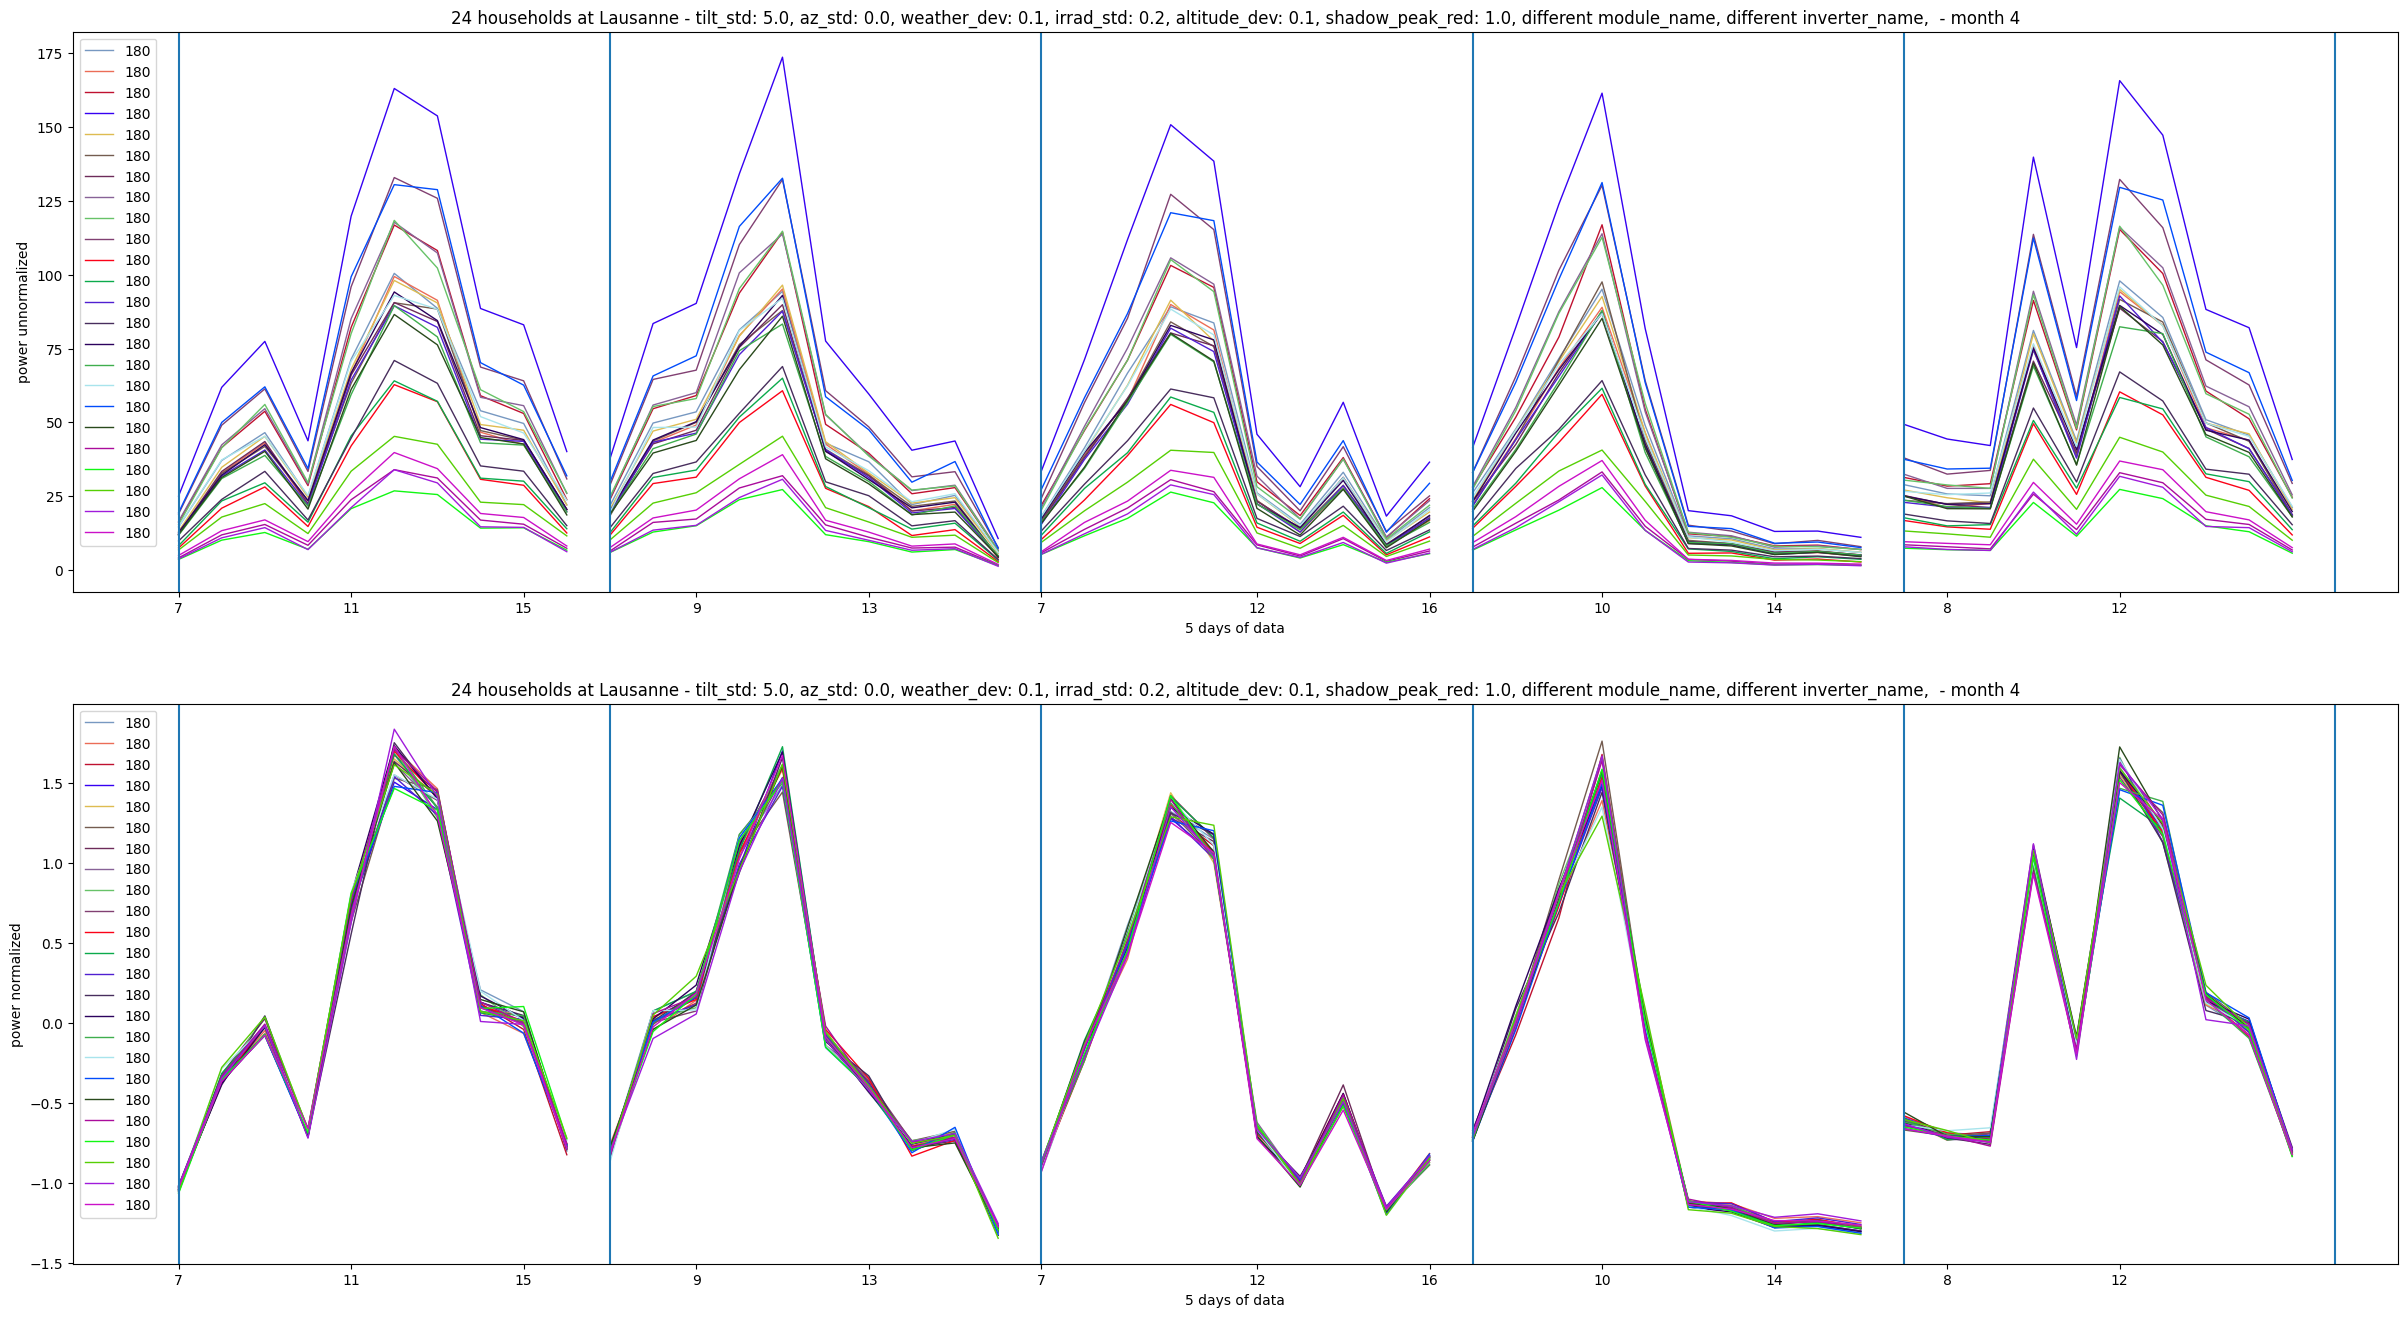

In [3]:
num_clients=24
city_names = ['Lausanne']
env_dict = {'city_names':city_names,
            'num_clients': num_clients, 'num_modes': len(city_names),
            'tilt_std': 5, 'az_std': 0, 'weather_dev':0.1,
            'irrad_std':0.2, 'altitude_dev':0.1, 'shadow_peak_red':1,
            'module_name': get_available_modules('sandia')[0:num_clients], #['Canadian_Solar_CS5P_220M___2009_'],
            'inverter_name': get_available_inverters('cec')[0:num_clients], # ['ABB__MICRO_0_25_I_OUTD_US_208__208V_'],
            'lags':[1], 'months':[3,4], 'hours':np.arange(7, 17), 'years':[2018, 2019],
            'train_scenarios':{'1y':{'m_train':None, 'train_years':[2018], 'exclude_last_year':True}}}

env_dict = PVDataset(env_dict).generate_clients_data()
print('\n'+env_dict['info'])

visualize_env(env_dict, num_days=5, year=2018)

# Change everything
This is the final env and is saved to be used later

In [4]:
exp_name = 'PV_UniModal'
generate_data = True
filename_env = os.getcwd() + "/../PV/saved_results/" + exp_name + "_env"


[INFO] generating data for Lausanne
[INFO] the following constnat features were removed:  station_irrad_direct_prev station_irrad_diffuse_prev
[INFO] the following constnat features were removed:  station_irrad_diffuse_prev lag 1
[INFO] the following constnat features were removed:  lag 1 lag 8
[INFO] the following constnat features were removed:  lag 8 lag 17
[INFO] saved data for 24 clients

24 households at Lausanne - tilt_std: 5.0, az_std: 15.0, weather_dev: 0.1, irrad_std: 0.2, altitude_dev: 0.1, shadow_peak_red: 0.6, different module_name, different inverter_name, 
sml has  50 train and 140 validation samples
1y has 610 train and 140 validation samples
5y has 3050 train and 140 validation samples
15y has 8540 train and 140 validation samples


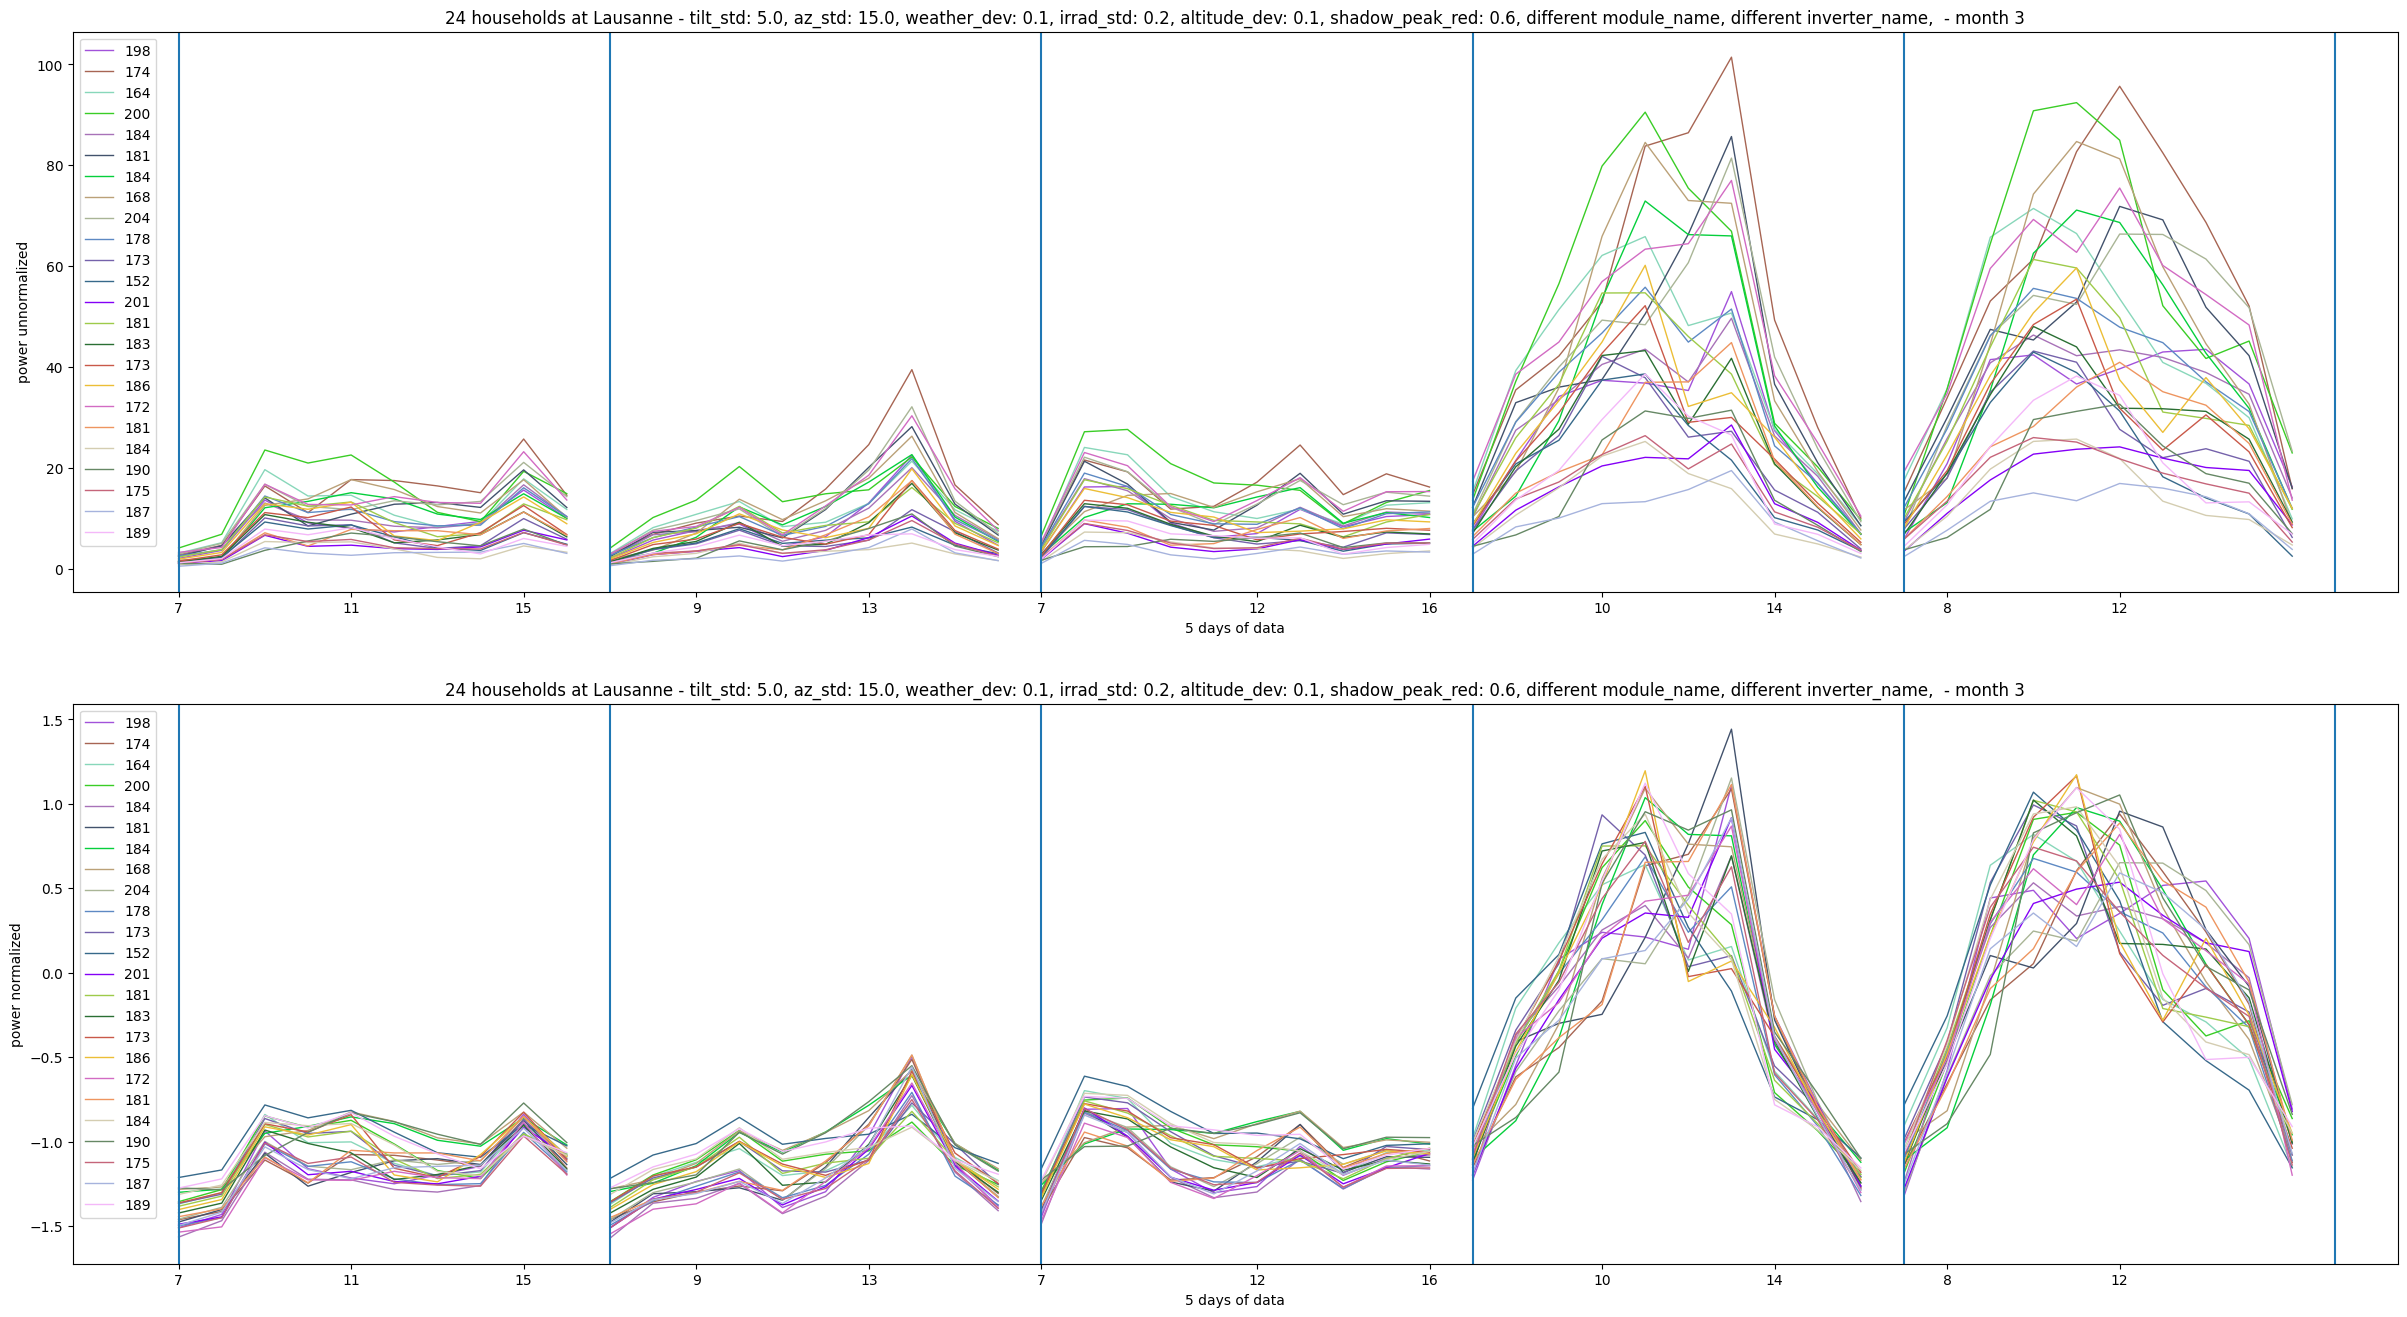

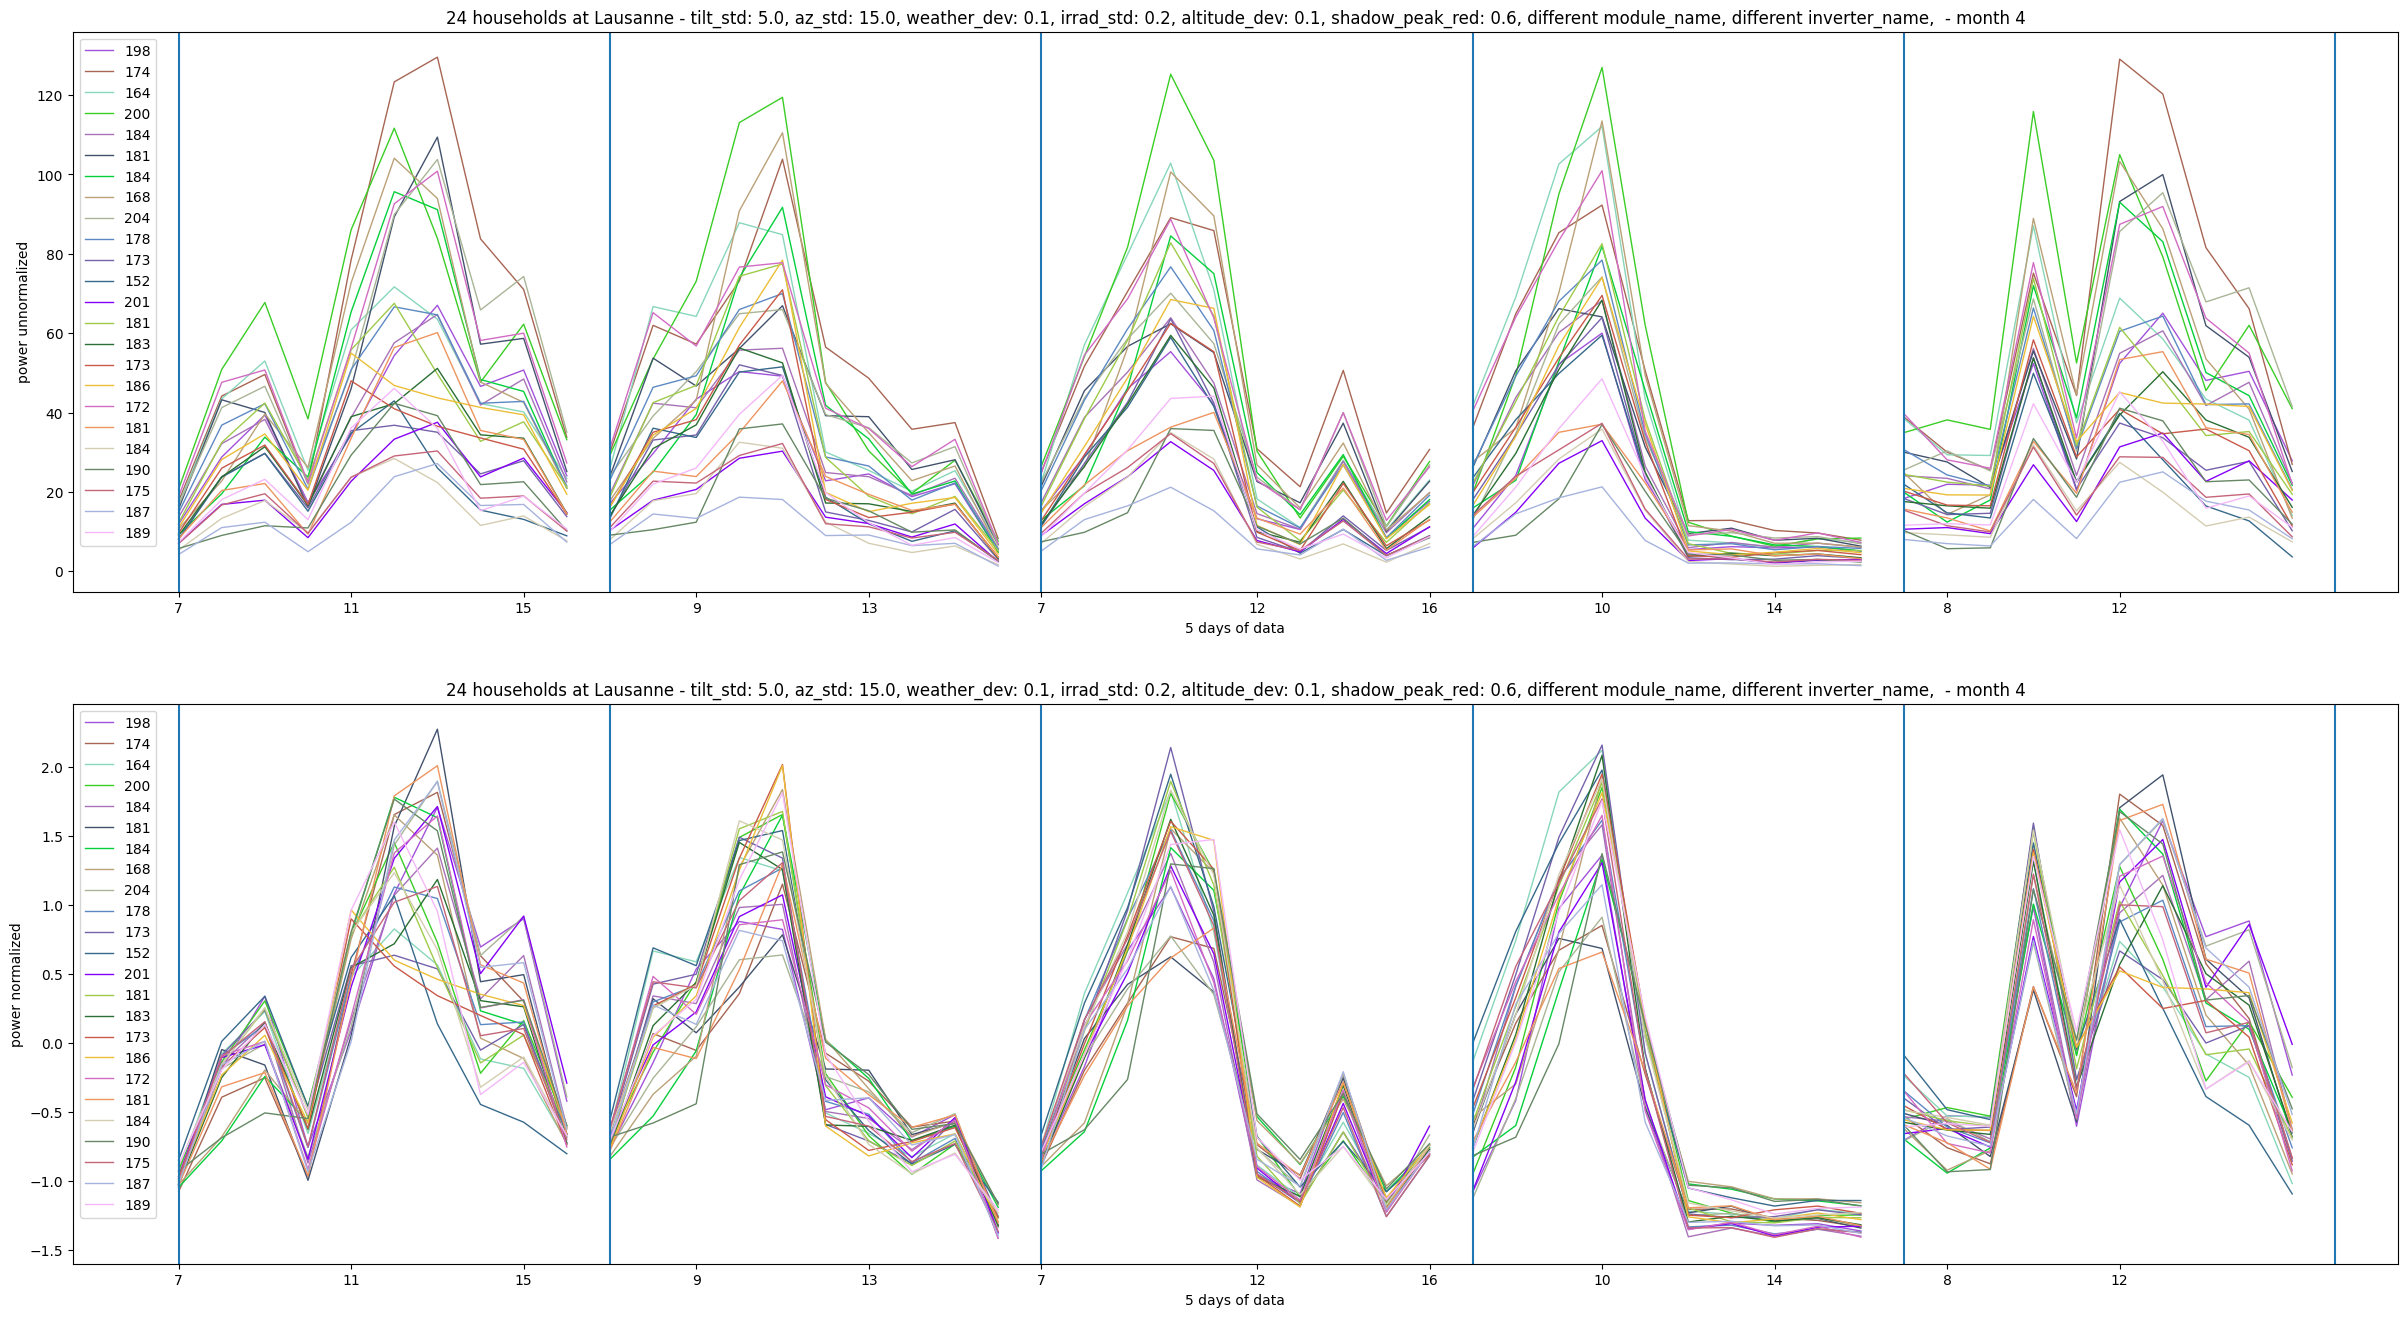

In [5]:
if generate_data:
    num_clients=24
    city_names = ['Lausanne']
    env_dict = {'city_names':city_names,
                'num_clients': num_clients, 'num_modes': len(city_names),
                'tilt_std': 5, 'az_std':15, 'weather_dev':0.1,
                'irrad_std':0.2, 'altitude_dev':0.1, 'shadow_peak_red':0.6,
                'module_name': get_available_modules('sandia')[0:num_clients],
                'inverter_name': get_available_inverters('cec')[0:num_clients],
                'lags':None, 'months':[3,4], 'hours':np.arange(7, 17), 'years':np.arange(2005, 2020),
                'use_station_irrad_direct':True, 'use_station_irrad_diffuse':True,
                'delay_irrad':True,
                'train_scenarios':{'sml':{'m_train':50, 'train_years':[2018], 'exclude_last_year':True},
                                '1y':{'m_train':None, 'train_years':[2018], 'exclude_last_year':True},
                                '5y':{'m_train':None, 'train_years':np.arange(2014, 2019), 'exclude_last_year':True},
                                '15y':{'m_train':None, 'train_years':None, 'exclude_last_year':True}}}
    env_dict = PVDataset(env_dict).generate_clients_data()
    # save env
    file = open(filename_env, 'wb')
    pickle.dump(env_dict, file)
    msg = '[INFO] saved data for {:2.0f} clients'.format(env_dict['num_clients'])
    generate_data = False
else:
    file = open(filename_env, 'rb')
    env_dict = pickle.load(file)
    msg = '[INFO] loaded data for {:2.0f} clients'.format(env_dict['num_clients'])
print(msg)
file.close()
print('\n'+env_dict['info'])

for scenario_name in env_dict['train_scenarios'].keys():
    print(scenario_name + ' has {:3.0f} train and {:3.0f} validation samples'.format(
                    env_dict['train_scenarios'][scenario_name]['clients_data'][0][0].shape[0],
                    env_dict['train_scenarios'][scenario_name]['clients_data'][0][2].shape[0]))
visualize_env(env_dict, num_days=5, year=2018, scenario_name='1y')

# Train-Test Split
* only in March and April
* 15 years of data
* different training scenarios using 2 weeks, 1 year, 5 years, and 15 years of data for training
* always test on last week of March and last week of April


# Part 2: Feature Engineering
Weather station direct and diffuse irradiation added to features of all houses
* Irradiation measured at a weather station not at each house => economically feasible
* Effect of including irradiation from weather station
* Do lags add more information?
    ** fit a linear model to 5 years of data, compare accuracies
* Using irradiation at t to predict power at t+1 vs. "predicted" irradiation at t+1 to predict power at t+1
    ** removing the need to another prediction model for the irradiation


### Results:
---------- LINEAR AND RIDGE REGRESSION WITHOUT GP ---------- <br>
sml<br>
with lags mean validation RMSE: 12.91 +/- 12.27<br>
no lags mean validation RMSE: 20.64 +/- 19.00<br>
no irradiation mean validation RMSE: 13.72 +/- 12.96<br>
delayed irradiation mean validation RMSE: 13.02 +/- 12.39<br>
1y<br>
with lags mean validation RMSE: 11.55 +/- 11.19<br>
no lags mean validation RMSE: 20.50 +/- 18.88<br>
no irradiation mean validation RMSE: 12.69 +/- 12.00<br>
delayed irradiation mean validation RMSE: 11.57 +/- 11.22<br>
5y<br>
with lags mean validation RMSE: 11.47 +/- 11.27<br>
no lags mean validation RMSE: 20.43 +/- 18.93<br>
no irradiation mean validation RMSE: 12.28 +/- 11.88<br>
delayed irradiation mean validation RMSE: 11.50 +/- 11.30<br>
15y<br>
with lags mean validation RMSE: 11.48 +/- 11.28<br>
no lags mean validation RMSE: 20.43 +/- 18.93<br>
no irradiation mean validation RMSE: 12.23 +/- 11.70<br>
delayed irradiation mean validation RMSE: 11.50 +/- 11.32<br>

In [6]:
''' Nicolas env
num_clients=5
city_names = ['Lausanne']
env_Nicolas = {'city_names':city_names,
            'num_clients': num_clients, 'num_modes': len(city_names),
            'tilt_std': 0, 'az_std':30, 'weather_dev':0,
            'irrad_std':0, 'altitude_dev':0, 'shadow_peak_red':1,
            'module_name': ['Canadian_Solar_CS5P_220M___2009_'],
            'inverter_name': ['ABB__MICRO_0_25_I_OUTD_US_208__208V_'],
            'lags':None, 'months':[3,4], 'hours':np.arange(24), 'years':[2018, 2019],
            'train_scenarios':{'1y':{'m_train':None, 'train_years':[2018], 'exclude_last_year':True}}}

env_Nicolas = PVDataset(env_Nicolas).generate_clients_data()
print('\n'+env_Nicolas['info'])

visualize_env(env_Nicolas, num_days=5)
'''

" Nicolas env\nnum_clients=5\ncity_names = ['Lausanne']\nenv_Nicolas = {'city_names':city_names,\n            'num_clients': num_clients, 'num_modes': len(city_names),\n            'tilt_std': 0, 'az_std':30, 'weather_dev':0,\n            'irrad_std':0, 'altitude_dev':0, 'shadow_peak_red':1,\n            'module_name': ['Canadian_Solar_CS5P_220M___2009_'],\n            'inverter_name': ['ABB__MICRO_0_25_I_OUTD_US_208__208V_'],\n            'lags':None, 'months':[3,4], 'hours':np.arange(24), 'years':[2018, 2019],\n            'train_scenarios':{'1y':{'m_train':None, 'train_years':[2018], 'exclude_last_year':True}}}\n\nenv_Nicolas = PVDataset(env_Nicolas).generate_clients_data()\nprint('\n'+env_Nicolas['info'])\n\nvisualize_env(env_Nicolas, num_days=5)\n"

In [7]:
run_cell = False
if run_cell:
    from utils.search_models import best_lin_reg
    normalize_data=True
    verbose=False

    num_clients=24
    city_names = ['Lausanne']
    env_dict_with_lags = {'city_names':city_names,
                'num_clients': num_clients, 'num_modes': len(city_names),
                'tilt_std': 5, 'az_std':15, 'weather_dev':0.1,
                'irrad_std':0.2, 'altitude_dev':0.1, 'shadow_peak_red':0.6,
                'module_name': get_available_modules('sandia')[0:num_clients],
                'inverter_name': get_available_inverters('cec')[0:num_clients],
                'lags':None, 'months':[3,4], 'hours':np.arange(7, 17), 
                'years':np.arange(2014, 2020), # 5 years of data
                'use_station_irrad_direct':True, 'use_station_irrad_diffuse':True,
                'delay_irrad':False, # this env uses predicted irrad
                'train_scenarios':{'sml':{'m_train':50, 'train_years':[2018], 'exclude_last_year':True},
                                '1y':{'m_train':None, 'train_years':[2018], 'exclude_last_year':True},
                                '5y':{'m_train':None, 'train_years':np.arange(2014, 2019), 'exclude_last_year':True},
                                '15y':{'m_train':None, 'train_years':None, 'exclude_last_year':True}}}
    env_dict_with_lags = PVDataset(env_dict_with_lags).generate_clients_data()

    env_dict_no_lags = copy.deepcopy(env_dict_with_lags)
    env_dict_no_irrad = copy.deepcopy(env_dict_with_lags)
    env_dict_delayed = copy.deepcopy(env_dict_with_lags)

    # features to keep 
    inds_to_keep_no_lags, inds_to_keep_no_irrad = [], []
    for ind, feature_name in enumerate(env_dict_with_lags['feature_names']):
        if not feature_name.startswith('lag'):
            inds_to_keep_no_lags.append(ind)
        if not feature_name.startswith('station_irrad'):
            inds_to_keep_no_irrad.append(ind)
    # features to delay for delayed irrads
    cols_to_delay=[]
    for ind, feature_name in enumerate(env_dict_delayed['feature_names']):
        if feature_name.startswith('station_irrad'):
            cols_to_delay.append(ind)

    # only keep the selected features
    for client_num in np.arange(env_dict_with_lags['num_clients']):
        for scenario in env_dict_with_lags['train_scenarios']:
            x_train, y_train, x_valid, y_valid = env_dict_with_lags['train_scenarios'][scenario]['clients_data'][client_num]
            # no lags
            x_train_no_lags = x_train[:, inds_to_keep_no_lags]
            x_valid_no_lags = x_valid[:, inds_to_keep_no_lags]
            env_dict_no_lags['train_scenarios'][scenario]['clients_data'][client_num] = (x_train_no_lags, y_train, x_valid_no_lags, y_valid)
            # no irrad
            x_train_no_irrad = x_train[:, inds_to_keep_no_irrad]
            x_valid_no_irrad = x_valid[:, inds_to_keep_no_irrad]
            env_dict_no_irrad['train_scenarios'][scenario]['clients_data'][client_num] = (x_train_no_irrad, y_train, x_valid_no_irrad, y_valid)
            # delayed irrad
            # NOTE: one less sample
            x_train_dalayed, y_train_dalayed = x_train[1:, :], y_train[1:]
            x_valid_dalayed, y_valid_dalayed = x_valid[1:, :], y_valid[1:]
            x_train_dalayed[:, cols_to_delay] = x_train[:-1, cols_to_delay]
            x_valid_dalayed[:, cols_to_delay] = x_valid[:-1, cols_to_delay]
            env_dict_delayed['train_scenarios'][scenario]['clients_data'][client_num] = (x_train_dalayed, y_train_dalayed, 
                                                            x_valid_dalayed, y_valid_dalayed)


    env_dict_no_lags['feature_names'] = [x for i, x in enumerate(env_dict_no_lags['feature_names']) if i in inds_to_keep_no_lags]
    env_dict_no_irrad['feature_names'] = [x for i, x in enumerate(env_dict_no_irrad['feature_names']) if i in inds_to_keep_no_irrad]



    print('\n---------- LINEAR AND RIDGE REGRESSION WITHOUT GP ----------')
    env_names = ['with lags', 'no lags', 'no irradiation', 'delayed irradiation']
    envs = [env_dict_with_lags, env_dict_no_lags, env_dict_no_irrad, env_dict_delayed]
    for scenario_name in env_dict_with_lags['train_scenarios'].keys():
        print(scenario_name)
        for env_tmp, env_name in zip(envs, env_names):
            # Linear regression without GP
            valid_rmses_linreg = np.zeros(num_clients)
            for client_num in np.arange(num_clients):
                if verbose:
                    print('\nClient {:2.0f}'.format(client_num))
                _, valid_rmses_linreg[client_num] = best_lin_reg(clients_data=env_tmp['train_scenarios'][scenario_name]['clients_data'], 
                            client_num=client_num, logger=None, normalize_data=normalize_data, verbose=verbose) 

            print(env_name + ' mean validation RMSE: {:2.2f} +/- {:.2f}'.format(np.mean(valid_rmses_linreg),
                                                                    1.96*np.std(valid_rmses_linreg)))


## 2.2 Checking modelling assumptions
* multicollinearity
* is data from each house homogeneous and i.i.d?
* are houses independent?

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

for train_scenario in env_dict['train_scenarios'].keys():
    print('\n Train scenario: ', train_scenario)
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = env_dict['feature_names']
    for client_num in np.arange(num_clients):
        # get train data
        X_train = env_dict['train_scenarios'][train_scenario]['clients_data'][client_num][0]

        # calculating VIF for each feature
        vif_data[str(client_num)] = [variance_inflation_factor(X_train, i)
                                for i in range(len(env_dict['feature_names']))]

    vif_data["average"] = vif_data.mean(axis=1)
    print(vif_data)



 Train scenario:  sml
  feature          0          1          2          3          4          5  \
0   H_sun  20.372343  19.277144  19.518019  37.007509  17.450557  21.846491   
1     T2m  10.320049   4.634477   5.952810  10.492018   4.267323   8.172401   
2   WS10m   4.142449   6.030176   3.718652   4.597136   4.299105   3.444810   
3  lag 17   1.712780   2.020292   1.821705   1.991649   1.624451   2.687449   
4  lag 19  15.515488  22.471480  17.661245  22.447176  22.734273  22.100571   
5  lag 20  24.169815  18.375377  18.175744  24.205719  19.605877  13.821619   
6  lag 21   5.327725   2.940196   1.573116   3.688895   1.700359   2.975089   
7  lag 22  17.363948  28.081227  15.391533  17.020194  14.438621  12.549505   
8  lag 23  19.319412  61.720538  26.239947  37.280519  18.796230  24.541903   

            6          7          8  ...         15         16         17  \
0   15.829536  18.258816  21.530175  ...  22.409580  31.512704  19.541608   
1    8.267514   8.791576   5.547

In [ ]:
import statsmodels

ModuleNotFoundError: No module named 'statsmodels'